<a href="https://colab.research.google.com/github/SivapriyaVenkateswarar/DATA-SCIENCE/blob/main/Hybrid_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split


# **DATA SET LOADING AND ANALYSIS**


In [2]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [3]:
df=pd.read_csv('/content/grive/MyDrive/AI /Class/Classification/Dataset1.csv')
print(df)

    profile_pic  ratio_numlen_username  len_fullname  ratio_numlen_fullname  \
0           Yes                   0.27             0                    0.0   
1           Yes                   0.00             2                    0.0   
2           Yes                   0.10             2                    0.0   
3           Yes                   0.00             1                    0.0   
4           Yes                   0.00             2                    0.0   
..          ...                    ...           ...                    ...   
691         Yes                   0.29             1                    0.0   
692         Yes                   0.40             1                    0.0   
693         Yes                   0.00             2                    0.0   
694          No                   0.17             1                    0.0   
695         Yes                   0.44             1                    0.0   

    sim_name_username  len_desc extern_url private 

In [4]:
df.head(10)

,profile_pic,ratio_numlen_username,len_fullname,ratio_numlen_fullname,sim_name_username,len_desc,extern_url,private,num_posts,num_followers,num_following,fake
0,Yes,0.27,0,0.0,No match,53,No,No,32,1000,955,0
1,Yes,0.00,2,0.0,Partial match,44,No,No,286,2740,533,0
2,Yes,0.10,2,0.0,Partial match,0,No,Yes,13,159,98,0
3,Yes,0.00,1,0.0,Partial match,82,No,No,679,414,651,0
4,Yes,0.00,2,0.0,No match,0,No,Yes,6,151,126,0
5,Yes,0.00,4,0.0,Partial match,81,Yes,No,344,669987,150,0
6,Yes,0.00,2,0.0,Partial match,50,No,No,16,122,177,0
7,Yes,0.00,2,0.0,No match,0,No,No,33,1078,76,0
8,Yes,0.00,0,0.0,Partial match,71,No,No,72,1824,2713,0
9,Yes,0.00,2,0.0,No match,40,Yes,No,213,12945,813,0


In [5]:
df

,profile_pic,ratio_numlen_username,len_fullname,ratio_numlen_fullname,sim_name_username,len_desc,extern_url,private,num_posts,num_followers,num_following,fake
0,Yes,0.27,0,0.0,No match,53,No,No,32,1000,955,0
1,Yes,0.00,2,0.0,Partial match,44,No,No,286,2740,533,0
2,Yes,0.10,2,0.0,Partial match,0,No,Yes,13,159,98,0
3,Yes,0.00,1,0.0,Partial match,82,No,No,679,414,651,0
4,Yes,0.00,2,0.0,No match,0,No,Yes,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
691,Yes,0.29,1,0.0,Partial match,0,No,No,13,114,811,1
692,Yes,0.40,1,0.0,Partial match,0,No,No,4,150,164,1
693,Yes,0.00,2,0.0,Partial match,0,No,No,3,833,3572,1
694,No,0.17,1,0.0,No match,0,No,No,1,219,1695,1


# Exploratory data analysis

The analysis method that Shows details on how the dataset is. It shows the number of rows and columns, The attributes, data type of each feature in the dataset.

In [6]:
df.shape # shows the number of rows and columns

(696, 12)

In [7]:
df.columns #Shows all the attributes and labels in the dataset (shows the column names)

Index(['profile_pic', 'ratio_numlen_username', 'len_fullname',
       'ratio_numlen_fullname', 'sim_name_username', 'len_desc', 'extern_url',
       'private', 'num_posts', 'num_followers', 'num_following', 'fake'],
      dtype='object')

In [8]:
df.info() #shows the type of data of each attribute and the total memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   profile_pic            696 non-null    object 
 1   ratio_numlen_username  696 non-null    float64
 2   len_fullname           696 non-null    int64  
 3   ratio_numlen_fullname  696 non-null    float64
 4   sim_name_username      696 non-null    object 
 5   len_desc               696 non-null    int64  
 6   extern_url             696 non-null    object 
 7   private                696 non-null    object 
 8   num_posts              696 non-null    int64  
 9   num_followers          696 non-null    int64  
 10  num_following          696 non-null    int64  
 11  fake                   696 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 65.4+ KB


# DATA PRE PROCESSING

## DATA CLEANING

In [9]:
df.isnull().sum() #checks if there is any empty spaces or NULL values in the attribute and sums it.
#df['profile_pic'].fillna(df['profile_pic'].mean(),inplace=True) #After finding the number of NULL spaces in a feature, This function will replace all the null values with the mean of that column.

,0
profile_pic,0
ratio_numlen_username,0
len_fullname,0
ratio_numlen_fullname,0
sim_name_username,0
len_desc,0
extern_url,0
private,0
num_posts,0
num_followers,0


## DATA TRANSFORMATION
categorical to numerical conversion
   1. label encoding: multiple variables conversion (numerical form)
   2. One heart encoding: Binary variable conversion (changes only 0 or 1)

In [10]:
# label encoding

le=LabelEncoder()
df['profile_pic'] = le.fit_transform(df['profile_pic'])
df['sim_name_username'] = le.fit_transform(df['sim_name_username'])
df['extern_url'] = le.fit_transform(df['extern_url'])
df['private'] = le.fit_transform(df['private'])
df

,profile_pic,ratio_numlen_username,len_fullname,ratio_numlen_fullname,sim_name_username,len_desc,extern_url,private,num_posts,num_followers,num_following,fake
0,1,0.27,0,0.0,1,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,2,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,2,0,0,1,13,159,98,0
3,1,0.00,1,0.0,2,82,0,0,679,414,651,0
4,1,0.00,2,0.0,1,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
691,1,0.29,1,0.0,2,0,0,0,13,114,811,1
692,1,0.40,1,0.0,2,0,0,0,4,150,164,1
693,1,0.00,2,0.0,2,0,0,0,3,833,3572,1
694,0,0.17,1,0.0,1,0,0,0,1,219,1695,1


## DATA SCALING
   1. minimum maximum scaling
   2. Robust scalar
   3. Standard scalar

In [11]:
df=df.to_numpy() #converting the dataset into numpy array
n_samples,n_features=df.shape
n_features=n_features-1 #used to count all the input features and neglect the output co;umn (last column)
#We should not apply normalization for labels/target/class (Output), We should only perform it for input features. For testing set we require only input features, so scaling is used.
x=df[:,0:n_features] #it only takes all the input features
y=df[:,n_features] #it only takes the output column
#sc=RobustScaler() #Calling the library, defining the scaling function
#x=sc.fit_transform(X) #The robust function is applied for the whole dataset
#X



# DATA SPLITTING:
Dataset is split To validate a model for real time

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) #test_size gives 20% of the dataset to testing.
print('training set size: {}, testing set size: {}'.format(X_train.shape,X_test.shape))

training set size: (556, 11), testing set size: (140, 11)


# MODEL TRAINING


In [13]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=1000)  #define the model
# ()-> Hyperparamters= Defined paramters for the algorithm.  If the paramters inside the bracket is not given by the user, then there will be predefined values.
model.fit(X_train,y_train) # X_train- input attributes of training set ,  y_train= labels of training set. apply the attributes to the model

GradientBoostingClassifier(n_estimators=1000)

# MODEL TESTING

To predict/validate testing set result output based on the trained ML model.

In [14]:
y_predict=model.predict(X_test)
y_predict=np.round(y_predict)
y_predict

array([0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1.])

# PERFORMANCE ANALYSIS
To analyse the performance of the model, We apply the metrics with the actual result and prediction (testing set) results.
1. confusion matrix
2. Accuracy
3. Precision
4. Recall
5. FI score

## CONFUSION MATRIX

Predict/Shows the number of predictions and mispredictions of the results.

In [15]:
cm=confusion_matrix(y_test, y_predict)
cm
# In the total number of 67 fake reports, 59 profiles were predicted correctly by the model

array([[58,  9],
       [ 5, 68]])

In [16]:
## Precision/ Recall/ F1 score

print(classification_report(y_test, y_predict))
score=round(accuracy_score(y_test, y_predict),4)*100
print('Accuracy score: {}% '.format(score))
#Total number of fake reports=67,
#Total number of real reports=73,
#Macro avg-> overall average of precision, recall and FI score
# accuracy= no'of correctly predicted outputs/ total number of testing outputs
# accuracy score=

              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89        67
         1.0       0.88      0.93      0.91        73

    accuracy                           0.90       140
   macro avg       0.90      0.90      0.90       140
weighted avg       0.90      0.90      0.90       140

Accuracy score: 90.0% 


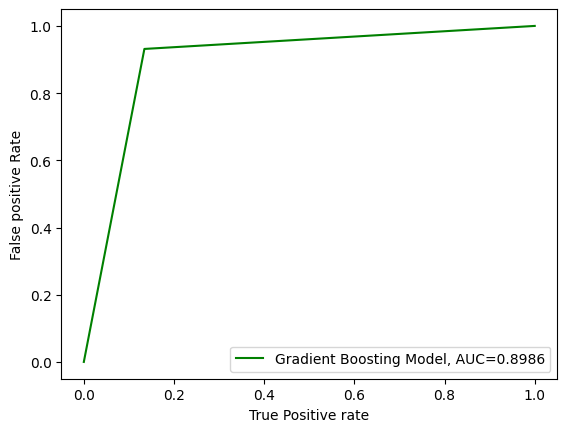

In [17]:
# ROC CURVE
from sklearn import metrics,preprocessing
fpr,tpr,_=metrics.roc_curve(y_test,y_predict)
#Ratio of the input features
auc=round(metrics.roc_auc_score(y_test,y_predict),4)
plt.plot(fpr,tpr,color="green",label='Gradient Boosting Model, AUC='+str(auc))

plt.xlabel("True Positive rate")
plt.ylabel("False positive Rate")
plt.legend()
plt.show()

1. randomforest classifier
2. SVM
3.  DEcision tree

# NOVELTY FOR ML RESEARCH

1.Hyperparameter tuning: Inorder to show that the model is unique we can show different parameters.

2.Hybrid model: To integrate two or more models through the voting classifier, then train and test them.

In [19]:
# BUILDING HYBRID MODEL
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
C1=GradientBoostingClassifier(n_estimators=100,random_state=1)
C2=RandomForestClassifier(n_estimators=40,random_state=42)
C3=DecisionTreeClassifier(criterion="entropy",max_depth=500)
C4=SVC(kernel="linear",C=10)
HM=VotingClassifier(estimators=[('GB',C1),('RF',C2),('DT',C3),('SVC',C4)],voting="hard")
#hard: only takes the result. Counts each of the predictions by the classifier and takes the majority of the predicted value. (vote)
#soft: Finds the probability score of each class in every classfier.

In [ ]:
HM.fit(X_train,y_train)

In [ ]:
y_predict_5=HM.predict(X_test)
y_predict_5=np.round(y_predict_5)
y_predict_5


In [ ]:
# PERFORMANCE ANALYSIS
# CONFUSION MATRIX:

cm_1=confusion_matrix(y_test, y_predict_5)
cm_1


In [ ]:
print(classification_report(y_test, y_predict_5))
score=round(accuracy_score(y_test, y_predict_5),4)*100
print('Accuracy score: {}% '.format(score))

In [ ]:
#Ty 1
C1=GradientBoostingClassifier(n_estimators=100,random_state=1)
C2=RandomForestClassifier(n_estimators=40,random_state=42)
HM=VotingClassifier(estimators=[('GB',C1),('RF',C2)],voting="soft")

In [ ]:
HM.fit(X_train,y_train)

In [ ]:
y_predict_5=HM.predict(X_test)
y_predict_5=np.round(y_predict_5)
y_predict_5

In [ ]:
# PERFORMANCE ANALYSIS
# CONFUSION MATRIX:

cm_1=confusion_matrix(y_test, y_predict_5)
cm_1

In [ ]:
print(classification_report(y_test, y_predict_5))
score=round(accuracy_score(y_test, y_predict_5),4)*100
print('Accuracy score: {}% '.format(score))

In [ ]:
#ty 2
C3=DecisionTreeClassifier(criterion="entropy",max_depth=500)
C4=SVC(kernel="linear",C=10)
HM=VotingClassifier(estimators=[('DT',C3),('SVC',C4)],voting="hard")

In [ ]:
HM.fit(X_train,y_train)

In [ ]:
y_predict_5=HM.predict(X_test)
y_predict_5=np.round(y_predict_5)
y_predict_5

In [ ]:
# PERFORMANCE ANALYSIS
# CONFUSION MATRIX:

cm_1=confusion_matrix(y_test, y_predict_5)
cm_1

In [ ]:
print(classification_report(y_test, y_predict_5))
score=round(accuracy_score(y_test, y_predict_5),4)*100
print('Accuracy score: {}% '.format(score))

In [ ]:
#ty 3
C1=GradientBoostingClassifier(n_estimators=100,random_state=1)
C4=SVC(kernel="linear",C=10)
HM=VotingClassifier(estimators=[('GB',C1),('SVC',C4)],voting="hard")

In [ ]:
HM.fit(X_train,y_train)

In [ ]:
y_predict_5=HM.predict(X_test)
y_predict_5=np.round(y_predict_5)
y_predict_5

In [ ]:
# PERFORMANCE ANALYSIS
# CONFUSION MATRIX:

cm_1=confusion_matrix(y_test, y_predict_5)
cm_1

In [ ]:
print(classification_report(y_test, y_predict_5))
score=round(accuracy_score(y_test, y_predict_5),4)*100
print('Accuracy score: {}% '.format(score))

In [ ]:
#ty 4
C2=RandomForestClassifier(n_estimators=40,random_state=42)
C3=DecisionTreeClassifier(criterion="entropy",max_depth=500)
HM=VotingClassifier(estimators=[('RF',C2),('DT',C3)],voting="hard")

In [ ]:
HM.fit(X_train,y_train)

In [ ]:
y_predict_5=HM.predict(X_test)
y_predict_5=np.round(y_predict_5)
y_predict_5

In [ ]:
# PERFORMANCE ANALYSIS
# CONFUSION MATRIX:

cm_1=confusion_matrix(y_test, y_predict_5)
cm_1

In [ ]:
print(classification_report(y_test, y_predict_5))
score=round(accuracy_score(y_test, y_predict_5),4)*100
print('Accuracy score: {}% '.format(score))

In [ ]:
#ty 5
C1=GradientBoostingClassifier(n_estimators=100,random_state=1)
C3=DecisionTreeClassifier(criterion="entropy",max_depth=500)
HM=VotingClassifier(estimators=[('GB',C1),('DT',C3)],voting="soft")

In [ ]:
HM.fit(X_train,y_train)

In [ ]:
y_predict_5=HM.predict(X_test)
y_predict_5=np.round(y_predict_5)
y_predict_5

In [ ]:
# PERFORMANCE ANALYSIS
# CONFUSION MATRIX:

cm_1=confusion_matrix(y_test, y_predict_5)
cm_1

In [ ]:
print(classification_report(y_test, y_predict_5))
score=round(accuracy_score(y_test, y_predict_5),4)*100
print('Accuracy score: {}% '.format(score))

In [ ]:
from sklearn.ensemble import VotingClassifier
C2=RandomForestClassifier(n_estimators=40,random_state=42)
C4=SVC(kernel="linear",C=10)
HM=VotingClassifier(estimators=[('RF',C2),('SVC',C4)],voting="hard")

In [ ]:
HM.fit(X_train,y_train)

In [ ]:
y_predict_5=HM.predict(X_test)
y_predict_5=np.round(y_predict_5)
y_predict_5

In [ ]:
# PERFORMANCE ANALYSIS
# CONFUSION MATRIX:

cm_1=confusion_matrix(y_test, y_predict_5)
cm_1

In [ ]:
print(classification_report(y_test, y_predict_5))
score=round(accuracy_score(y_test, y_predict_5),4)*100
print('Accuracy score: {}% '.format(score))

In [ ]:
C2=RandomForestClassifier(n_estimators=40,random_state=42)
C3=DecisionTreeClassifier(criterion="entropy",max_depth=500)
C4=SVC(kernel="linear",C=10)
HM=VotingClassifier(estimators=[('RF',C2),('DT',C3),('SVC',C4)],voting="soft")

In [ ]:
HM.fit(X_train,y_train)

In [ ]:
y_predict_5=HM.predict(X_test)
y_predict_5=np.round(y_predict_5)
y_predict_5

In [ ]:
# PERFORMANCE ANALYSIS
# CONFUSION MATRIX:

cm_1=confusion_matrix(y_test, y_predict_5)
cm_1

In [ ]:
print(classification_report(y_test, y_predict_5))
score=round(accuracy_score(y_test, y_predict_5),4)*100
print('Accuracy score: {}% '.format(score))

In [ ]:
C1=GradientBoostingClassifier(n_estimators=100,random_state=1)
C2=RandomForestClassifier(n_estimators=40,random_state=42)
C4=SVC(kernel="linear",C=10)
HM=VotingClassifier(estimators=[('GB',C1),('RF',C2),('SVC',C4)],voting="soft")

In [ ]:
HM.fit(X_train,y_train)

In [ ]:
y_predict_5=HM.predict(X_test)
y_predict_5=np.round(y_predict_5)
y_predict_5

In [ ]:
# PERFORMANCE ANALYSIS
# CONFUSION MATRIX:

cm_1=confusion_matrix(y_test, y_predict_5)
cm_1

In [ ]:
print(classification_report(y_test, y_predict_5))
score=round(accuracy_score(y_test, y_predict_5),4)*100
print('Accuracy score: {}% '.format(score))

In [ ]:
C1=GradientBoostingClassifier(n_estimators=100,random_state=1)
C3=DecisionTreeClassifier(criterion="entropy",max_depth=500)
C4=SVC(kernel="linear",C=10)
HM=VotingClassifier(estimators=[('GB',C1),('DT',C3),('SVC',C4)],voting="soft")

In [ ]:
HM.fit(X_train,y_train)

In [ ]:
y_predict_5=HM.predict(X_test)
y_predict_5=np.round(y_predict_5)
y_predict_5

In [ ]:
# PERFORMANCE ANALYSIS
# CONFUSION MATRIX:

cm_1=confusion_matrix(y_test, y_predict_5)
cm_1

In [ ]:
print(classification_report(y_test, y_predict_5))
score=round(accuracy_score(y_test, y_predict_5),4)*100
print('Accuracy score: {}% '.format(score))